* Since I have import all the functions to the __init__ file, I could just use functions from package instead of module

In [1]:
import waste_not_the_water

dff = waste_not_the_water.data_import_clean()

C:\Users\wyuen\Miniconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
dff.head()

,Capacity,Latitude,LoadEntering,Longitude
aggID,,,,
25040.0,0.0,53.68200,6280.0,16.939000
14568.0,0.0,28.55198,0.0,-16.381400
14543.0,0.0,37.32565,0.0,-4.156176
NaN,0.0,53.48847,0.0,-1.217900
14541.0,0.0,37.31332,0.0,-3.305946


* The function already helps organize the data in the ascending order of Capacity, Therefore, as we create list of capcity, it will also be in mathematical order

In [3]:
# If prefering to use the function from the module, then import the module first
from waste_not_the_water import basemap

In [4]:
lat,lon,capacity,magnitude = basemap.create_basic_list(dff)

* Above is the list made from 'Latitude','Longitude','Capacity' columnn of above DataFrame
* Magnitude scales the Capacity Down 100000 times so that it could be used as reference of dot size of map shown in few lines

In [5]:
dff.shape

(22877, 4)

* Since The data are too large and it is not necessary to look up every single points of the raw data,We could make sublist for visualization 

In [6]:
# Make sure use same index for each list so that the data is corresponding
lat0 = lat[19000:22000]
lon0 = lon[19000:22000]
capacity0 = capacity[19000:22000]
magnitude0 = magnitude[19000:22000]

C:\Users\wyuen\Miniconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\Users\wyuen\Miniconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


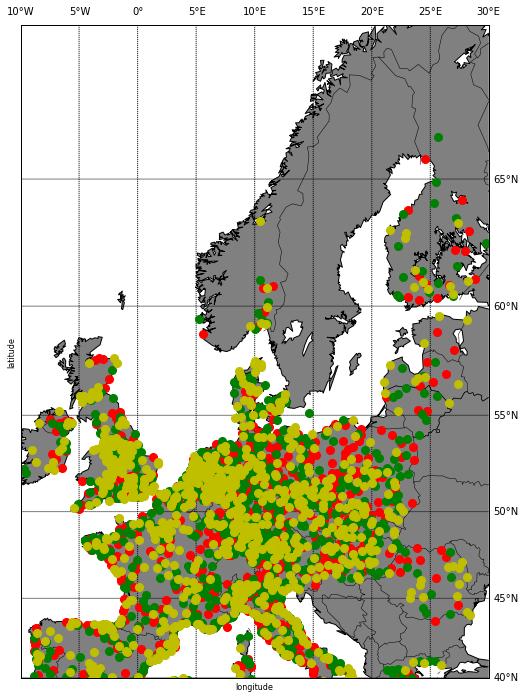

In [7]:
basemap.get_color_graph(lon0,lat0,capacity0)

* From least to most, for every 1/3 sets of points,the color are red,green and yellow
* It could be shown that the plant with different size capacity are overlapping heavily

C:\Users\wyuen\Miniconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\Users\wyuen\Miniconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


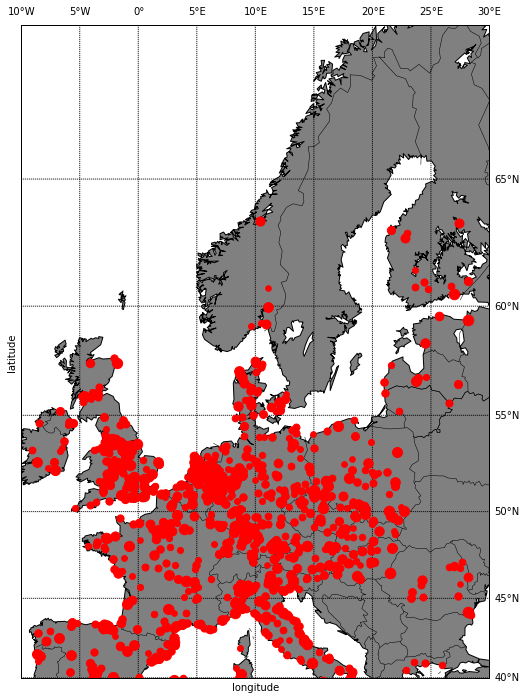

In [8]:
# Now if we want to see specific color more clearly, we could draw another type map of that region
# First chossing yellow range
lat1 = lat0[2000:2999]
lon1 = lon0[2000:2999]
magnitude1 = magnitude0[2000:2999]
capacity1 = capacity0[2000:2999]

# Then draw the map on which the dots size is proportional to the size of magnitude and thus capacity
basemap.get_size_map(lon1,lat1,magnitude1)

* Since the above graph is still not detailed enough, we could make a interactive map that could be zoomed in or out

In [9]:
basemap.create_interactive_map(lat1,lon1,capacity1)

* Click on the dots will show the latitude, longitude and the Capcity of the plant

In [10]:
# Now we could combine the mapping to machine learning study
# Suppose we have a Customer data, we could draw it on the map and also the two data points that related to it will also shown on map
# Let us simulate a customer dataframe first
import pandas as pd
customer=pd.DataFrame(data={'Latitude':[49.88,42.12,46.77],'LoadEntering':[6782,3453,24532],'Longitude':[18.22,27.65,13.54],'NRemoval':[True,True,False],
                           'PRemoval':[True,True,True]})

In [11]:
from waste_not_the_water import linear_regression
from waste_not_the_water import nearest_n

basemap.interactive_customer_map(customer,1)

* Click on the dots would have information got from machine learning model